<h1>Challenge1</h1>

In [18]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
print("Python Version:", sys.version)

df1=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt")
df2=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170909.txt")
df3=pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170902.txt")

df=pd.concat([df1,df2,df3])

Python Version: 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


<h1>Challenge2</h1>

In [19]:
df["DATETIME"]=df["DATE"]+" "+df["TIME"]
df["DATETIME"]=pd.to_datetime(df["DATETIME"], format="%m/%d/%Y %H:%M:%S")
df[:3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,2017-09-09 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00


<h1>Challenge3</h1>

In [20]:
df["NETENTRIES"]=df["ENTRIES"]
df.NETENTRIES=df['ENTRIES']-df['NETENTRIES'].shift(1)
#removes incorrect values where the turnstile has changed
dfmask= df.SCP != df.SCP.shift(1)
df.NETENTRIES[dfmask]=np.nan
df.groupby(['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE']).sum()
#removes outliers
df=df[(df.NETENTRIES<100000) & (df.NETENTRIES>0)]
df.reset_index()[:3]

/home/sufyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NETENTRIES
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00,26.0
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00,17.0
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,2017-09-09 12:00:00,80.0


<h1>Challenge4</h1>

In [21]:
df.groupby(['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE']).sum()['NETENTRIES'].plot()

In [24]:
df[0:3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NETENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,2017-09-09 04:00:00,26.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,2017-09-09 08:00:00,17.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,2017-09-09 12:00:00,80.0


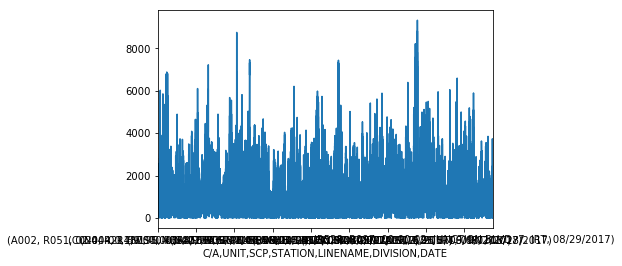

In [22]:
plt.show()

**TA COMMNT:**

This plot is difficult to comprehend. Try focusing on just one turnstile instead of trying to plot every turnstile on the same plot.

<h1>Challenge5</h1>

In [26]:
df.groupby(['C/A','UNIT','SCP','STATION','DATE']).sum().NETENTRIES[:5]

C/A   UNIT  SCP       STATION  DATE      
A002  R051  02-00-00  59 ST    08/26/2017     537.0
                               08/27/2017     539.0
                               08/28/2017    1198.0
                               08/29/2017    1305.0
                               08/30/2017    1393.0
Name: NETENTRIES, dtype: float64

<h1>Challenge6</h1>

In [25]:
df.groupby(['C/A','STATION','DATE']).sum().NETENTRIES[:5]

C/A   STATION  DATE      
A002  59 ST    08/26/2017     5407.0
               08/27/2017     5608.0
               08/28/2017    11525.0
               08/29/2017    12694.0
               08/30/2017    13064.0
Name: NETENTRIES, dtype: float64

<h1>Challenge7</h1>

In [29]:
df.groupby(['C/A','STATION','DATE']).sum().NETENTRIES[:5].plot()

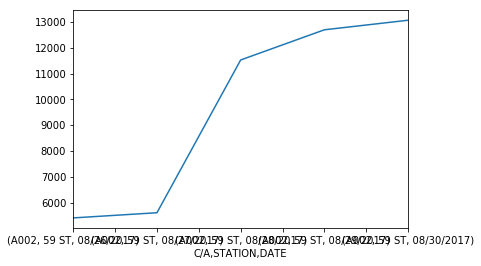

In [30]:
plt.show()

**TA COMMENT:**

For the x-labels, I would only show the date and title the plot with the specific C/A and station. 

<h1>Challenge8</h1>

In [42]:
#df['DATEWEEK'] = pd.to_datetime(df['DATE']) - pd.to_timedelta(-7, unit='d')
df['DATEWEEK'] = df['DATETIME'].dt.dayofweek

In [49]:
df.groupby(['C/A','STATION','DATEWEEK']).NETENTRIES.sum().plot()

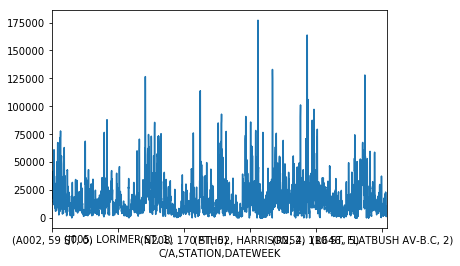

In [50]:
plt.show()

**TA COMMENT:**

Same comment as above. Formatting plots is an important aspect of visualizations.

In [110]:
fig, ax = plt.subplots()
labels = []
lines, _ = ax.get_legend_handles_labels()

for key, grp in df.groupby(['C/A','STATION','DATEWEEK']):
    ax = grp.plot(ax=ax, kind='line', x='STATION', y='NETENTRIES', c=key)
    labels.append(key)
    
ax.legend(lines, labels, loc='best')
plt.show()

KeyboardInterrupt: 

In [109]:
plt.show()

<h1>Challenge9</h1>

In [76]:
df.groupby(['STATION']).sum().sort_values(['NETENTRIES'],ascending=False)[0:3]

,ENTRIES,EXITS,NETENTRIES,DATEWEEK
STATION,,,,
34 ST-PENN STA,451523137437,368891769619,2717049.0,32832
GRD CNTRL-42 ST,322164488651,160369370151,2386082.0,19945
23 ST,443442356605,362071600664,1893271.0,20223


<h1>Challenge10</h1>

In [107]:
df.groupby(['STATION']).sum().sort_values(['NETENTRIES'],ascending=False).plot(y='NETENTRIES');

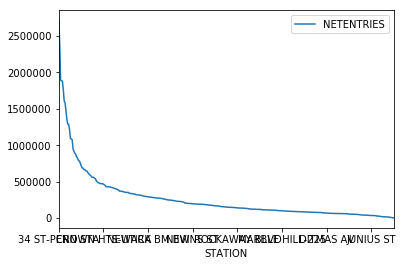

In [102]:
plt.show()

**TA COMMENT:**

I would angle the station names so they don't overlap

In [105]:
plt.hist(list(df.groupby(['STATION']).sum().sort_values(['NETENTRIES'],ascending=False).NETENTRIES));

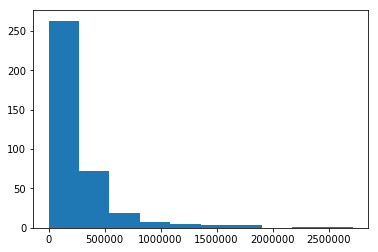

In [106]:
plt.show()

**TA COMMENT:**

Overall, the code seems good and readable. The main thing to work on would be to work on making your visuals easier to comprehend. Titles, axes titles, axes labels, and the data you present in your plots are important aspects of creating a visual. 